In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as stats
import csv
import dash
import dash_core_components as dcc
import dash_html_components as html

In [2]:
forbes1 = pd.read_csv("forbes1.csv", header = None)
forbes2 = pd.read_csv("forbes2.csv", header = None) 

In [3]:
forbes2.drop_duplicates

<bound method DataFrame.drop_duplicates of                                   0        1                             2  \
0                           #1 ICBC    $311B                   Major Banks   
1        #2 China Construction Bank  $261.2B                   Major Banks   
2                 #3 JPMorgan Chase  $387.7B                   Major Banks   
3             #4 Berkshire Hathaway  $491.9B           Investment Services   
4     #5 Agricultural Bank of China  $184.1B                Regional Banks   
5                #6 Bank of America  $313.5B                   Major Banks   
6                    #7 Wells Fargo  $265.3B                   Major Banks   
7                          #8 Apple  $926.9B             Computer Hardware   
8                  #9 Bank of China  $158.6B                   Major Banks   
9       #10 Ping An Insurance Group  $181.4B         Diversified Insurance   
10            #11 Royal Dutch Shell  $306.5B          Oil & Gas Operations   
11                 #1

In [4]:
forbes2.columns = ['CompRank', 'Market Capitalization', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees']

In [5]:
forbes1.columns = ['Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value']

In [6]:
forbes2[["Rank", "Name"]] = forbes2['CompRank'].str.split(n = 1, expand = True)

In [7]:
forbes2 = forbes2.drop(['CompRank'], axis = 1)

In [8]:
forbes2.columns = ['Market Value', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees', 'Rank', 'Company']

In [9]:
forbes = forbes2.merge(forbes1, on = 'Company')

In [10]:
forbes = forbes.drop("Market Value_x", axis = 1)

In [11]:
forbes = forbes.drop("Country_x", axis = 1)

In [12]:
cols = forbes.columns.tolist()
cols = ['Rank', 'Company', 'Country_y', 'Industry', 'Assets', 'Sales', 'Profits', 'Market Value_y', 'Employees', 'Founded', 'Chairman']

In [13]:
forbes = forbes[cols]

In [14]:
forbes = forbes.rename(columns = {'Country_y': 'Country', 'Market Value_y': 'Market Capitalization'})

In [15]:
indexNames = forbes[forbes['Industry'] == '1973'].index
forbes.drop(indexNames , inplace=True)

In [16]:
indexNames = forbes[forbes['Industry'] == '1984'].index
forbes.drop(indexNames , inplace=True)

In [17]:
indexNames = forbes[forbes['Industry'] == '1986'].index
forbes.drop(indexNames , inplace=True)

In [18]:
indexNames = forbes[forbes['Industry'] == '1987'].index
forbes.drop(indexNames , inplace=True)

In [19]:
indexNames = forbes[forbes['Industry'] == '1988'].index
forbes.drop(indexNames , inplace=True)

In [20]:
indexNames = forbes[forbes['Industry'] == '1993'].index
forbes.drop(indexNames , inplace=True)

In [21]:
indexNames = forbes[forbes['Industry'] == '1995'].index
forbes.drop(indexNames , inplace=True)

In [22]:
indexNames = forbes[forbes['Industry'] == '1998'].index
forbes.drop(indexNames , inplace=True)

In [23]:
indexNames = forbes[forbes['Industry'] == '1999'].index
forbes.drop(indexNames , inplace=True)

In [24]:
indexNames = forbes[forbes['Industry'] == '2000'].index
forbes.drop(indexNames , inplace=True)

In [25]:
indexNames = forbes[forbes['Industry'] == '2003'].index
forbes.drop(indexNames , inplace=True)

In [26]:
indexNames = forbes[forbes['Industry'] == '2006'].index
forbes.drop(indexNames , inplace=True)

In [27]:
indexNames = forbes[forbes['Industry'] == '2008'].index
forbes.drop(indexNames , inplace=True)

In [28]:
indexNames = forbes[forbes['Industry'] == '2010'].index
forbes.drop(indexNames , inplace=True)

In [29]:
indexNames = forbes[forbes['Industry'] == '2012'].index
forbes.drop(indexNames , inplace=True)

In [30]:
indexNames = forbes[forbes['Industry'] == '2018'].index
forbes.drop(indexNames , inplace=True)

In [31]:
#American companies

In [32]:
forbes_US = forbes.loc[forbes['Country'] == 'United States']

In [33]:
forbes_US.head()

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
2,#3,JPMorgan Chase,United States,Major Banks,"$2,609.8 B",$118.2 B,$26.5 B,$387.7 B,"252,539",1968,Jamie Dimon
3,#4,Berkshire Hathaway,United States,Investment Services,$702.7 B,$235.2 B,$39.7 B,$491.9 B,"377,000",1955,Warren Buffett
5,#6,Bank of America,United States,Major Banks,"$2,328.5 B",$103 B,$20.3 B,$313.5 B,"209,000",1904,Brian Moynihan
6,#7,Wells Fargo,United States,Major Banks,"$1,915.4 B",$102.1 B,$21.7 B,$265.3 B,"262,700",1852,Timothy Sloan
7,#8,Apple,United States,Computer Hardware,$367.5 B,$247.5 B,$53.3 B,$926.9 B,"123,000",1976,Tim Cook


In [37]:
# barplot countries data

In [38]:
forbes_CountryCount = forbes.groupby('Country', as_index = False).count()

In [39]:
cols = forbes_CountryCount.columns.tolist()
cols

['Country',
 'Rank',
 'Company',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Founded',
 'Chairman']

In [40]:
cols = ['Country', 'Rank']

In [41]:
forbes_CountryCount = forbes_CountryCount[cols]

In [42]:
forbes_CountryCount = forbes_CountryCount.rename(columns = {'Rank': 'Count'})

In [43]:
forbes_CountryCount = forbes_CountryCount.sort_values(by = ['Count'], ascending = False)

In [44]:
forbes_CountryCount = forbes_CountryCount.reset_index()

In [49]:
forbes_CountryCount = forbes_CountryCount.drop('index', axis = 1)

In [ ]:
forbes_CountryCount = forbes_CountryCount.iloc[:20]

In [62]:
forbes_CountryCount

,Country,Count
0,United States,549
1,Japan,231
2,China,223
3,United Kingdom,86
4,South Korea,68
5,France,59
6,Hong Kong,59
7,India,56
8,Germany,54
9,Canada,50


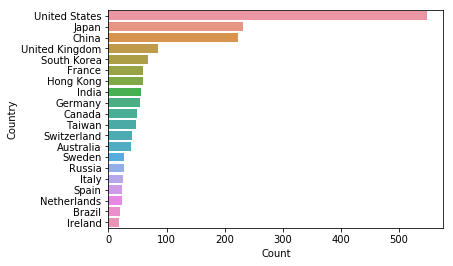

In [64]:
country_bar = sns.barplot(x = 'Count', y = 'Country', data = forbes_CountryCount, orient = 'h')

In [72]:
# barplot year founded

In [103]:
forbes_FoundedCount = forbes.groupby('Founded', as_index = False).count()

In [104]:
cols = forbes_FoundedCount.columns.tolist()
cols

['Founded',
 'Rank',
 'Company',
 'Country',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Chairman']

In [105]:
cols = ['Founded', 'Rank']

In [106]:
forbes_FoundedCount = forbes_FoundedCount[cols]

In [107]:
forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Rank': 'Count'})

In [108]:
forbes_FoundedCount = forbes_FoundedCount.sort_values(by = ['Count'], ascending = False)

In [109]:
forbes_FoundedCount = forbes_FoundedCount.iloc[:8]

In [ ]:
forbes_FoundedCount = forbes_FoundedCount.reset_index()

In [ ]:
forbes_FoundedCount = forbes_FoundedCount.drop('index', axis = 1)

In [164]:
forbes_FoundedCount

,Founded,Count
0,1997,43
1,1996,36
2,1995,33
3,1999,33
4,1994,30
5,2005,29
6,1993,27
7,2000,27


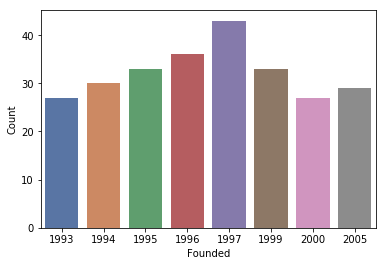

In [111]:
founded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_FoundedCount, palette = 'deep')

In [112]:
# barplot Industries

In [139]:
forbes_IndustryCount = forbes.groupby('Industry', as_index = False).count()

In [140]:
cols = forbes_IndustryCount.columns.tolist()
cols

['Industry',
 'Rank',
 'Company',
 'Country',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Founded',
 'Chairman']

In [141]:
cols = ['Industry', 'Rank']

In [142]:
forbes_IndustryCount = forbes_IndustryCount[cols]

In [143]:
forbes_IndustryCount = forbes_IndustryCount.rename(columns = {'Rank': 'Count'})

In [144]:
forbes_IndustryCount = forbes_IndustryCount.sort_values(by = ['Count'], ascending = False)

In [146]:
forbes_IndustryCount = forbes_IndustryCount.iloc[:15]

In [ ]:
forbes_IndustryCount = forbes_IndustryCount.reset_index()

In [159]:
forbes_IndustryCount = forbes_IndustryCount.drop('index', axis = 1)

In [160]:
forbes_IndustryCount

,Industry,Count
0,Regional Banks,244
1,Investment Services,89
2,Oil & Gas Operations,83
3,Real Estate,83
4,Electric Utilities,79
5,Major Banks,63
6,Telecommunications services,55
7,Construction Services,54
8,Diversified Insurance,50
9,Food Processing,44


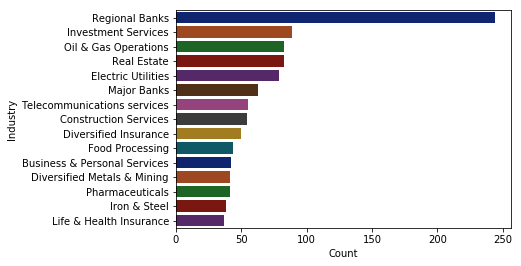

In [152]:
industry_bar = sns.barplot(x = 'Count', y='Industry', data = forbes_IndustryCount, palette = 'dark', orient = 'h')

In [ ]:
#American Companies

In [ ]:
forbes_USIndustry = forbes

In [ ]:
forbes_USIndustry = forbes.loc[forbes['Country'] == 'United States']

In [ ]:
forbes_USIndustry = forbes_USIndustry.groupby(['Country', 'Industry']).count()

In [ ]:
forbes_USIndustry.head()

In [ ]:
cols = forbes_USIndustry.columns.tolist()

In [ ]:
cols

In [ ]:
cols = ['Rank']

In [ ]:
forbes_USIndustry = forbes_USIndustry[cols]

In [ ]:
forbes_USIndustry = forbes_USIndustry.rename(columns = {'Rank': 'Count'})

In [ ]:
forbes_USIndustry = forbes_USIndustry.sort_values(by = 'Count', ascending = False)

In [ ]:
forbes_USIndustry.iloc[:20]

In [66]:
# Presentation

In [97]:
forbes_CountryCount

,Country,Count
0,United States,549
1,Japan,231
2,China,223
3,United Kingdom,86
4,South Korea,68
5,France,59
6,Hong Kong,59
7,India,56
8,Germany,54
9,Canada,50


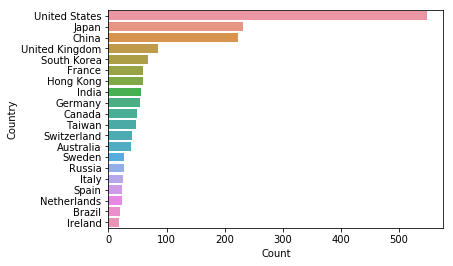

In [114]:
country_bar = sns.barplot(x = 'Count', y = 'Country', data = forbes_CountryCount, orient = 'h')

In [161]:
forbes_IndustryCount

,Industry,Count
0,Regional Banks,244
1,Investment Services,89
2,Oil & Gas Operations,83
3,Real Estate,83
4,Electric Utilities,79
5,Major Banks,63
6,Telecommunications services,55
7,Construction Services,54
8,Diversified Insurance,50
9,Food Processing,44


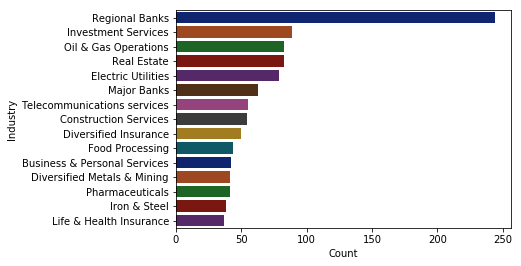

In [154]:
industry_bar = sns.barplot(x='Count', y='Industry', data = forbes_IndustryCount, palette = 'dark', orient = 'h')

In [165]:
forbes_FoundedCount

,Founded,Count
0,1997,43
1,1996,36
2,1995,33
3,1999,33
4,1994,30
5,2005,29
6,1993,27
7,2000,27


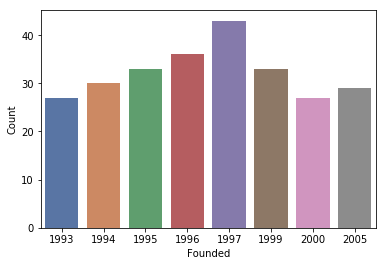

In [100]:
founded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_FoundedCount, palette = 'deep')